## 2021 Spring "EE479: Scientific Computing & Data"

### Yong-Hoon Kim, KAIST Electrical Engineering

### Linge & Langtagen Ch.4.3.10:  Illusteration of linear damping with sinusoidal excitation & resonance

#### Writer: Hyeonwoo Yeo
#### 2021. 04. 13 revised from <osc_EC_general.py>

We now extend the previous example to also invole some external oscillating force on the system: $F(t) = Asin(\omega t)$. Driving a car on a road with sinusoidal bumps might give such an external excitation on the spring system in the car ($\omega$ is related to the velocity of the car). With $A = 0.5$ and $\omega = 3$.

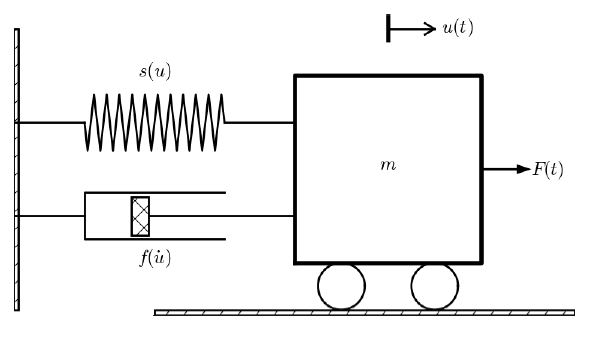


40


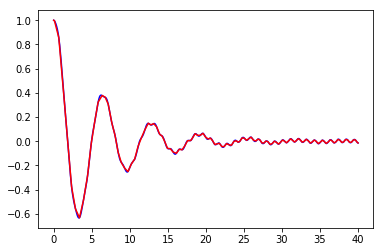

In [14]:
from math import pi, sin
import matplotlib.pyplot as plt
from scipy import integrate as inte
import time

def g(t,Y):
    m = 1
    k = 1
    b = 0.3
    
    u=Y[0]
    v=Y[1]
    dydt=v
    
    w = 6
    A = 0.5
   # F = A*sin(t)    #Resonance
    F = A*sin(w*t)
    
    s = k*u
    f = b*v
    dvdt=(1./m)*(F - f - s)
    return [dydt,dvdt]

max_iteration = 10**3
t_bound = 40
max_step = 1
U_0 = 1
V_0 = 0

solution = inte.BDF(g, 0, [U_0,V_0], t_bound, max_step) #vectorized=True
start_solution = time.time()
t_solution = []
y_solution = []
for i in range(max_iteration):
# get solution step state
    solution.step() #implemented function in scipy to collect data
    t_solution.append(solution.t)
    y_solution.append(solution.y[0])
    if solution.status == 'finished' :
        time_solution = time.time() - start_solution
        print(max(t_solution))
        break
        
solution2 = inte.RK45(g, 0, [U_0,V_0], t_bound, max_step) #vectorized=True

t_solution2 = []
y_solution2 = []
for i in range(max_iteration):
# get solution step state
    solution2.step() #implemented function in scipy to collect data
    t_solution2.append(solution2.t)
    y_solution2.append(solution2.y[0])
    if solution2.status == 'finished' :
        break
        
index = int(len(y_solution)*100/100.)

plt.plot(t_solution[-index:], y_solution[-index:], 'b-',t_solution2[-index:], y_solution2[-index:], 'r-' )
plt.show()

#print("calculation time:", time_solution)
